In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import KFold

from utils import prog_read_csv, generate_data_splits
from dataloading import HistoricalYahoo, calculate_metrics, get_reference_data
from bow import GET_BOW_RESULTS
from model import GET_FFNBOW_RESULTS

INPUT_DATA_NAME = '8K_data_short.tsv'
# INPUT_DATA_NAME = '8K_data.tsv'
PICKLED_YFINANCE = 'TIKR_DATA.pkl'
HOLD_PERIOD=90

EVAL_YEAR = 2018
EVAL_YEAR = datetime.strptime(str(EVAL_YEAR) + '0101', '%Y%m%d')

K = 4
# Load data
keys = ['text', 'label', 'Date', 'tikr']
data = prog_read_csv(INPUT_DATA_NAME, sep='\t',
                     usecols=keys, desc='Loading Data')
data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d')

# Load historical returns
yd = HistoricalYahoo()
yd.preload_tikrs(data)
calculate_metrics(yd, HOLD_PERIOD, silent=True)

strategy = 'chronological_yearly'
model = GET_BOW_RESULTS
EVALUATION_TYPE = 'k_fold'
model_savepath = 'test1'
# model = GET_FFNBOW_RESULTS
all_metrics = []
N_YEARS = 2023-EVAL_YEAR.year+1
output_df = pd.DataFrame()
predictions_from_training = []
score_from_training = []
for idx, (train_val_df, testdf) in enumerate(
            generate_data_splits(data, strategy=strategy,
                                 periods_to_test=N_YEARS)):

    # x_train, y_train = traindf['text'], traindf['label']
    # x_test, y_test = testdf['text'], testdf['label']
    for k, (train_index, test_index) in enumerate(KFold(n_splits=K, shuffle=True).split(train_val_df)):
        
        traindf = train_val_df.iloc[train_index]
        validationdf = train_val_df.iloc[test_index]
        print(k)

        """
        total_test = len(y_test)
        total_train = len(y_train)
        for idx, label in enumerate(['negative', 'positive', 'neutral']):
            prop_train = sum(y_train == idx)/total_train
            prop_test = sum(y_test == idx)/total_test
            print(f"{label} - test: {prop_test:0.4f}, train: {prop_train:0.4f}")
        """
        out = None
        out, metrics = model(traindf, validationdf, testdf)
        
#         out['Date'] = pd.to_datetime(out['Date'], format="%Y%m%d")
#         predictions_from_training.append(out['pred'])
#         score_from_training.append(out['score'])
#         metrics.year = testdf.Date.iloc[0].year
#         metrics.k = k
#         print(metrics.year)
#         print(metrics)
        all_metrics.append(metrics)
#         get_reference_data(out, yd, cols=['Annual Return', 'beta', 'sp Annual', 'sp Percent'])
        
        
#         temp_df = pd.DataFrame()
#         temp_df[['tikr', 'Date','label', 'pred', 'score']] = out[['tikr', 'Date','label', 'pred', 'score']]
#         temp_df['pred'] = temp_df['pred'].astype(int)
#         temp_df['year'] = [metrics.year]*len(out)
#         temp_df['k'] = [k]*len(out)
        
#         metrics = Metrics()
#         predictions = np.array(temp_df['score'])
#         empty = np.empty((predictions.shape[0],))
#         preds = np.column_stack((predictions, empty))
#         metrics.calculate(temp_df['label'], preds, split='test')
        print(metrics)
        metrics = Metrics()
        predictions = np.array(out['score'])
        empty = np.empty((predictions.shape[0],))
        preds = np.column_stack((predictions, empty))
        metrics.calculate(out['label'], preds, split='test')
        print(metrics)
        
        
        temp_df.reset_index(drop=True)
        output_df = pd.concat([output_df, temp_df])
output_df.reset_index(drop=True).to_csv(f'test_output_{model_savepath}.csv')

Loading Data:   0%|          | 0/14 [00:00<?, ?it/s]

Across 13 years, train on 7 with 1-year duration testing on 6 different years
0
{ Train features: 2528.000, test_auroc: 0.546, test_acc_over_random: -0.020, test_Pat10%: 0.700, validation_auroc: 0.671, validation_acc_over_random: 0.180, validation_Pat10%: 0.600, train_auroc: 0.915, train_acc_over_random: 0.328, train_Pat10%: 0.983 }
{ test_auroc: 0.465, test_acc_over_random: -0.120, test_Pat10%: 0.600 }
1
{ Train features: 2671.000, test_auroc: 0.584, test_acc_over_random: -0.050, test_Pat10%: 0.600, validation_auroc: 0.674, validation_acc_over_random: 0.110, validation_Pat10%: 0.600, train_auroc: 0.920, train_acc_over_random: 0.383, train_Pat10%: 1.000 }
{ test_auroc: 0.546, test_acc_over_random: -0.020, test_Pat10%: 0.700 }
2
{ Train features: 2572.000, test_auroc: 0.560, test_acc_over_random: -0.080, test_Pat10%: 0.600, validation_auroc: 0.673, validation_acc_over_random: 0.125, validation_Pat10%: 0.650, train_auroc: 0.923, train_acc_over_random: 0.377, train_Pat10%: 0.983 }
{ test_

In [64]:
# predictions_from_training = np.array(predictions_from_training, int)
# predictions_from_training = predictions_from_training.flatten()
# score_from_training = np.array(score_from_training.flatten())

In [65]:
# test_predictions_csv = np.array(output_df['pred'])
# test_score_csv = np.array(output_df['score'])

In [66]:
# (test_predictions_csv  == predictions_from_training).all()


In [67]:
# (score_from_training  == test_score_csv).all()

In [68]:
# (np.array(test_build_predictions).flatten() == test_score_csv).all()

In [69]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
import numpy as np

In [71]:
output_df.head(100)

,tikr,Date,label,pred,score,year,k
800,AZO,2018-10-16,1,0,0.471477,2018,0
801,UNH,2018-10-16,0,0,0.575349,2018,0
802,ABBV,2018-09-13,1,0,0.543310,2018,0
803,C,2018-01-16,0,0,0.515188,2018,0
804,CP,2018-05-25,1,0,0.558697,2018,0
...,...,...,...,...,...,...,...
895,WFC,2018-06-07,0,0,0.538276,2018,0
896,AMD,2018-08-22,1,0,0.469278,2018,0
897,MNST,2018-12-07,0,0,0.535717,2018,0
898,EIX,2018-07-26,0,0,0.536518,2018,0


In [78]:
import pandas as pd
from dataloading import HistoricalYahoo, calculate_metrics, get_reference_data
from metrics import Metrics
from collections import defaultdict

def build_metrics(output):
    test_build_scores = []
    metrics_dict = defaultdict(dict)
    all_metrics = []
    # Group the DataFrame by year and k category
    grouped = output.groupby(['year', 'k'])
    for name, group in grouped:
        print(name)
        print(group)
        metrics = Metrics()
        predictions = np.array(group['score'])
        test_build_scores.append(group['score'])
        empty = np.empty((predictions.shape[0],))
        preds = np.column_stack((predictions, empty))
        metrics.calculate(group['label'], preds, split='test')
        print(metrics)
        metrics.year = name[0]
        metrics.k = name[1]
        metrics_dict[name[0]][name[1]]= metrics
    return metrics_dict, test_build_scores

metrics_dict, test_build_predictions = build_metrics(output_df)
metrics_dict


(2018, 0)
     tikr       Date  label  pred     score  year  k
800   AZO 2018-10-16      1     0  0.471477  2018  0
801   UNH 2018-10-16      0     0  0.575349  2018  0
802  ABBV 2018-09-13      1     0  0.543310  2018  0
803     C 2018-01-16      0     0  0.515188  2018  0
804    CP 2018-05-25      1     0  0.558697  2018  0
..    ...        ...    ...   ...       ...   ... ..
895   WFC 2018-06-07      0     0  0.538276  2018  0
896   AMD 2018-08-22      1     0  0.469278  2018  0
897  MNST 2018-12-07      0     0  0.535717  2018  0
898   EIX 2018-07-26      0     0  0.536518  2018  0
899  SNPS 2018-05-23      1     0  0.569004  2018  0

[100 rows x 7 columns]
{ test_auroc: 0.516, test_acc_over_random: -0.030, test_Pat10%: 0.700 }
(2018, 1)
     tikr       Date  label  pred     score  year  k
800   AZO 2018-10-16      1     0  0.448317  2018  1
801   UNH 2018-10-16      0     0  0.509702  2018  1
802  ABBV 2018-09-13      1     0  0.515188  2018  1
803     C 2018-01-16      0     0  0

       tikr       Date  label  pred     score  year  k
1200   FITB 2022-06-27      1     0  0.574434  2022  2
1201   DXCM 2022-02-10      0     0  0.575540  2022  2
1202    AEP 2022-10-27      1     0  0.447040  2022  2
1203   DASH 2022-07-13      0     0  0.516635  2022  2
1204   KLAC 2022-06-08      0     0  0.356160  2022  2
...     ...        ...    ...   ...       ...   ... ..
1295   ALNY 2022-03-17      0     0  0.508991  2022  2
1296    LNG 2022-07-26      1     1  0.659523  2022  2
1297    STZ 2022-05-06      1     1  0.632777  2022  2
1298   FITB 2022-07-28      1     0  0.594582  2022  2
1299  BRK-B 2022-11-21      0     0  0.433302  2022  2

[100 rows x 7 columns]
{ test_auroc: 0.537, test_acc_over_random: 0.020, test_Pat10%: 0.700 }
(2022, 3)
       tikr       Date  label  pred     score  year  k
1200   FITB 2022-06-27      1     0  0.582922  2022  3
1201   DXCM 2022-02-10      0     0  0.605671  2022  3
1202    AEP 2022-10-27      1     0  0.468315  2022  3
1203   DASH 202

defaultdict(dict,
            {2018: {0: { test_auroc: 0.516, test_acc_over_random: -0.030, test_Pat10%: 0.700 },
              1: { test_auroc: 0.560, test_acc_over_random: -0.050, test_Pat10%: 0.600 },
              2: { test_auroc: 0.569, test_acc_over_random: -0.060, test_Pat10%: 0.600 },
              3: { test_auroc: 0.527, test_acc_over_random: -0.120, test_Pat10%: 0.500 }},
             2019: {0: { test_auroc: 0.559, test_acc_over_random: 0.000, test_Pat10%: 0.600 },
              1: { test_auroc: 0.478, test_acc_over_random: -0.080, test_Pat10%: 0.600 },
              2: { test_auroc: 0.500, test_acc_over_random: -0.040, test_Pat10%: 0.500 },
              3: { test_auroc: 0.488, test_acc_over_random: -0.020, test_Pat10%: 0.600 }},
             2020: {0: { test_auroc: 0.454, test_acc_over_random: 0.030, test_Pat10%: 0.400 },
              1: { test_auroc: 0.556, test_acc_over_random: 0.090, test_Pat10%: 0.700 },
              2: { test_auroc: 0.512, test_acc_over_random: 0.030

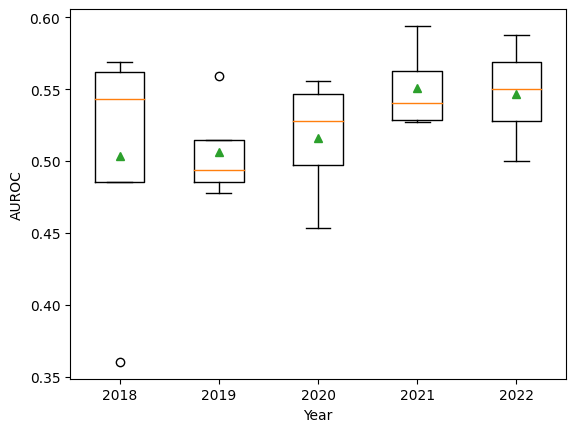

In [73]:
def boxplot(data, metric_name, save_path=None):
    auroc_values = {}
    for year, values in data.items():
        auroc_values[year] = [v[metric_name] for v in values.values()]
    
    # Plot the boxplots
    fig, ax = plt.subplots()
    ax.boxplot(auroc_values.values(), showmeans=True)
    ax.set_xticklabels(auroc_values.keys())
    ax.set_xlabel('Year')
    ax.set_ylabel('AUROC')
    plt.show()






#     if save_path:
#         plt.savefig(f'{save_path}_boxplot.png')
#     else:
#         plt.savefig('figs/boxplot.png')

boxplot(metrics_dict, 
   "test_auroc", save_path="figs/short_data_auroc")

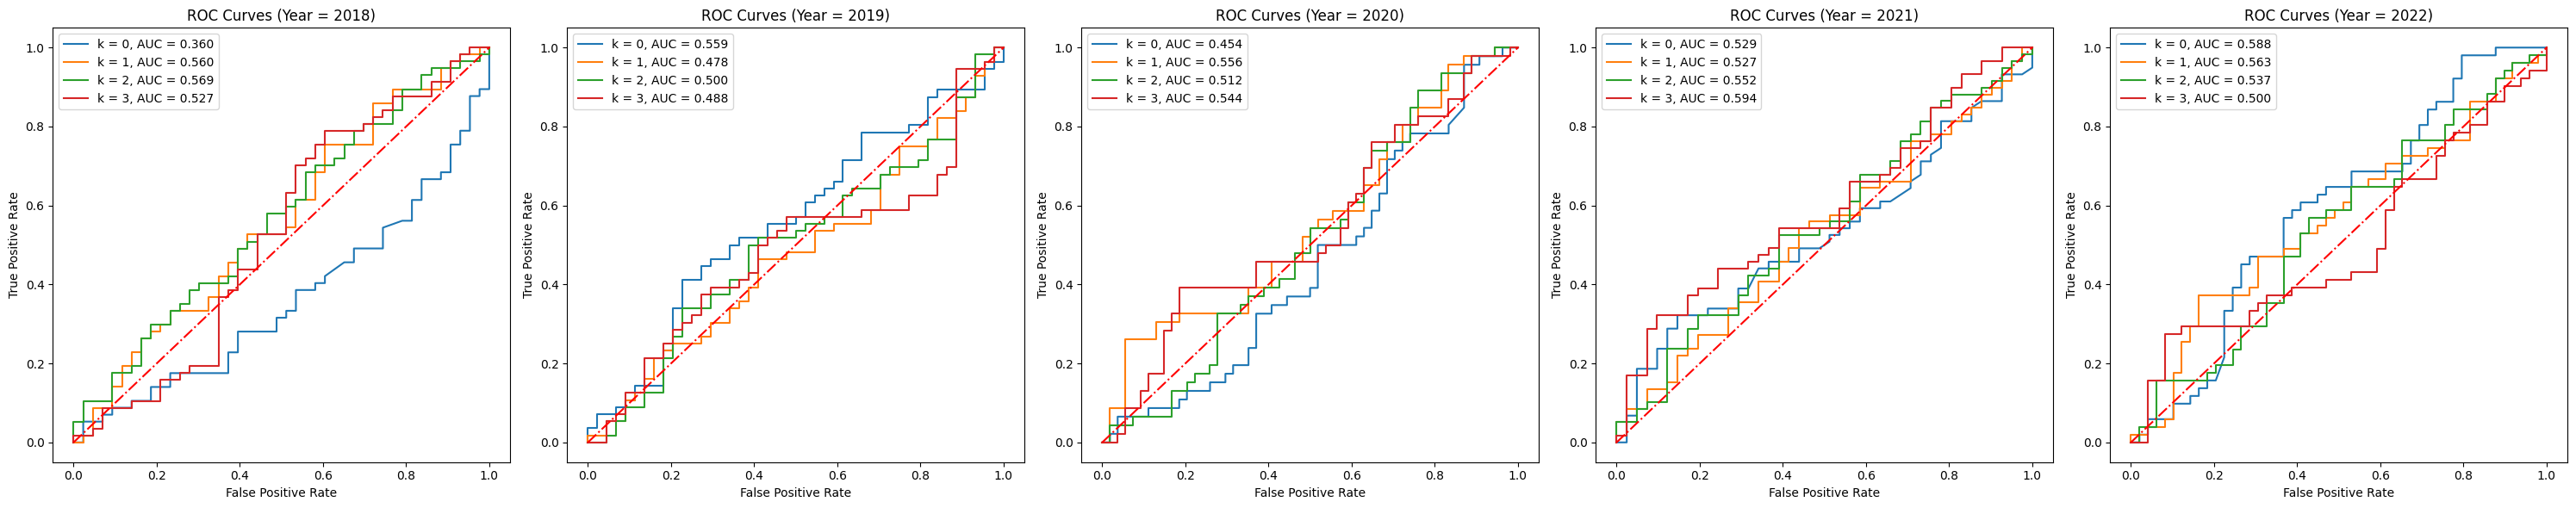

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

data = metrics_dict

def plot_roc(data):
    num_years = len(data.keys())

    fig, axs = plt.subplots(1, num_years, figsize=(num_years * 6, 6))
    
    for i, year in enumerate(data):
        for k in data[year]:
            fpr, tpr = data[year][k]['_test_ROC']
            auroc = data[year][k]['test_auroc']
            axs[i].plot(fpr, tpr, label=f'k = {k}, AUC = {auroc:.3f}')

        axs[i].set_xlabel('False Positive Rate')
        axs[i].set_ylabel('True Positive Rate')
        axs[i].plot([0, 1], [0, 1], 'r-.')
        axs[i].set_title(f'ROC Curves (Year = {year})')
        axs[i].legend()
        
        
        

    plt.tight_layout()
    plt.show()


plot_roc(data)



In [60]:
data = pd.read_csv('model_outputs/outputs_test1.csv')

In [61]:
metrics_dict, test_build_predictions = build_metrics(data)


{ test_auroc: 0.500, test_acc_over_random: -0.067, test_Pat10%: 0.486 }
{ test_auroc: 0.500, test_acc_over_random: -0.067, test_Pat10%: 0.486 }
{ test_auroc: 0.541, test_acc_over_random: 0.000, test_Pat10%: 0.608 }
{ test_auroc: 0.535, test_acc_over_random: 0.001, test_Pat10%: 0.524 }
{ test_auroc: 0.536, test_acc_over_random: -0.001, test_Pat10%: 0.539 }
{ test_auroc: 0.536, test_acc_over_random: -0.002, test_Pat10%: 0.539 }
{ test_auroc: 0.536, test_acc_over_random: 0.002, test_Pat10%: 0.549 }
{ test_auroc: 0.536, test_acc_over_random: -0.002, test_Pat10%: 0.613 }
{ test_auroc: 0.539, test_acc_over_random: 0.000, test_Pat10%: 0.544 }
{ test_auroc: 0.536, test_acc_over_random: -0.001, test_Pat10%: 0.539 }
{ test_auroc: 0.538, test_acc_over_random: 0.002, test_Pat10%: 0.605 }
{ test_auroc: 0.534, test_acc_over_random: 0.001, test_Pat10%: 0.538 }
{ test_auroc: 0.498, test_acc_over_random: 0.560, test_Pat10%: 0.084 }
{ test_auroc: 0.642, test_acc_over_random: 0.560, test_Pat10%: 0.477 }


In [130]:
metrics_dict

defaultdict(dict,
            {2018: {1: { test_auroc: 0.500, test_acc_over_random: -0.067, test_Pat10%: 0.486 },
              2: { test_auroc: 0.500, test_acc_over_random: -0.067, test_Pat10%: 0.486 },
              3: { test_auroc: 0.541, test_acc_over_random: 0.000, test_Pat10%: 0.608 },
              4: { test_auroc: 0.535, test_acc_over_random: 0.001, test_Pat10%: 0.524 },
              5: { test_auroc: 0.536, test_acc_over_random: -0.001, test_Pat10%: 0.539 },
              6: { test_auroc: 0.536, test_acc_over_random: -0.002, test_Pat10%: 0.539 },
              7: { test_auroc: 0.536, test_acc_over_random: 0.002, test_Pat10%: 0.549 },
              8: { test_auroc: 0.536, test_acc_over_random: -0.002, test_Pat10%: 0.613 },
              9: { test_auroc: 0.539, test_acc_over_random: 0.000, test_Pat10%: 0.544 },
              10: { test_auroc: 0.536, test_acc_over_random: -0.001, test_Pat10%: 0.539 },
              11: { test_auroc: 0.538, test_acc_over_random: 0.002, test_Pat10%

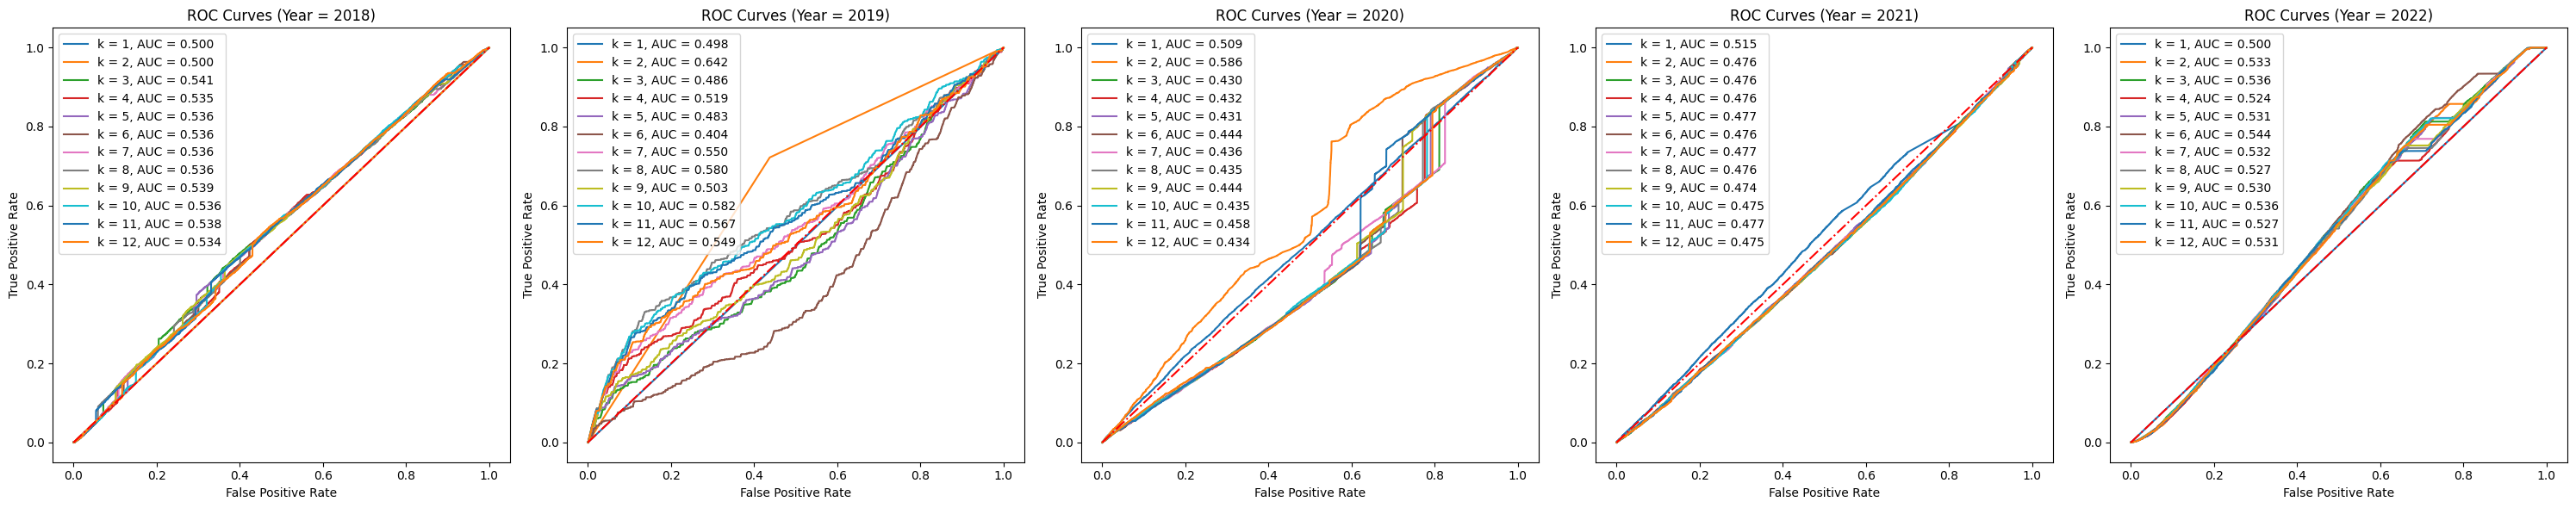

In [128]:
plot_roc(metrics_dict)

2018
_train_acc_pos_average: 0.838
_train_acc_pos_min: 0.822
_train_acc_pos_max: 0.848
_validation_acc_pos_average: 0.59
_validation_acc_pos_min: 0.565
_validation_acc_pos_max: 0.635
_test_acc_pos_average: 0.518
_test_acc_pos_min: 0.45
_test_acc_pos_max: 0.59


2019
_train_acc_pos_average: 0.822
_train_acc_pos_min: 0.812
_train_acc_pos_max: 0.835
_validation_acc_pos_average: 0.577
_validation_acc_pos_min: 0.56
_validation_acc_pos_max: 0.595
_test_acc_pos_average: 0.492
_test_acc_pos_min: 0.43
_test_acc_pos_max: 0.54


2020
_train_acc_pos_average: 0.792
_train_acc_pos_min: 0.783
_train_acc_pos_max: 0.8
_validation_acc_pos_average: 0.555
_validation_acc_pos_min: 0.54
_validation_acc_pos_max: 0.565
_test_acc_pos_average: 0.542
_test_acc_pos_min: 0.49
_test_acc_pos_max: 0.58


2021
_train_acc_pos_average: 0.792
_train_acc_pos_min: 0.785
_train_acc_pos_max: 0.802
_validation_acc_pos_average: 0.569
_validation_acc_pos_min: 0.545
_validation_acc_pos_max: 0.6
_test_acc_pos_average: 0.568
_test

{2018: {'_train_acc_pos_average': 0.8383333333333334,
  '_train_acc_pos_min': 0.8216666666666667,
  '_train_acc_pos_max': 0.8483333333333334,
  '_validation_acc_pos_average': 0.59,
  '_validation_acc_pos_min': 0.565,
  '_validation_acc_pos_max': 0.635,
  '_test_acc_pos_average': 0.5175,
  '_test_acc_pos_min': 0.45,
  '_test_acc_pos_max': 0.59},
 2019: {'_train_acc_pos_average': 0.8220833333333333,
  '_train_acc_pos_min': 0.8116666666666666,
  '_train_acc_pos_max': 0.835,
  '_validation_acc_pos_average': 0.5774999999999999,
  '_validation_acc_pos_min': 0.56,
  '_validation_acc_pos_max': 0.595,
  '_test_acc_pos_average': 0.4925,
  '_test_acc_pos_min': 0.43,
  '_test_acc_pos_max': 0.54},
 2020: {'_train_acc_pos_average': 0.7925,
  '_train_acc_pos_min': 0.7833333333333333,
  '_train_acc_pos_max': 0.8,
  '_validation_acc_pos_average': 0.555,
  '_validation_acc_pos_min': 0.54,
  '_validation_acc_pos_max': 0.565,
  '_test_acc_pos_average': 0.5425,
  '_test_acc_pos_min': 0.49,
  '_test_acc_pos

<Figure size 6000x300 with 0 Axes>

<Figure size 6000x300 with 0 Axes>

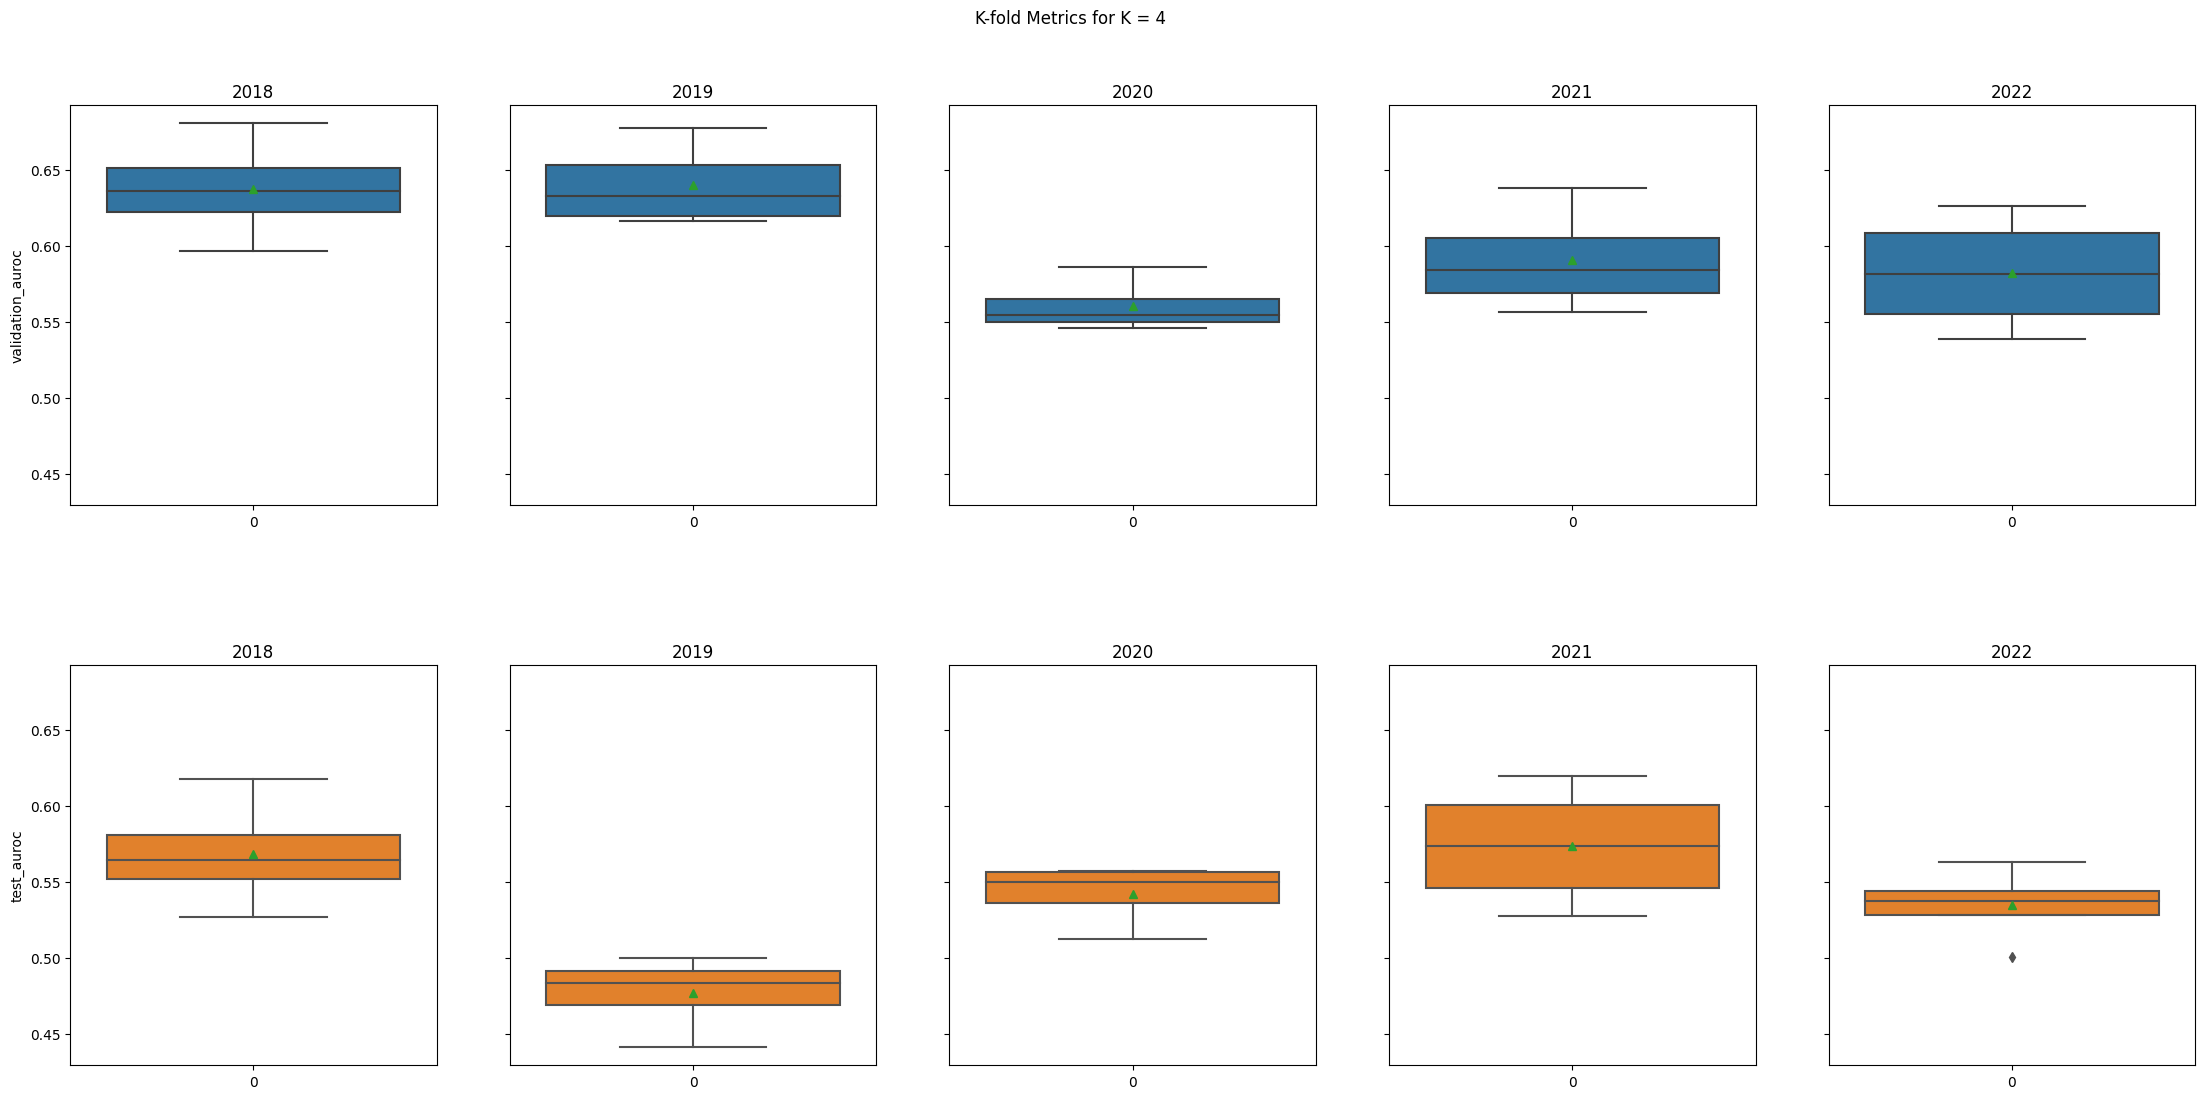

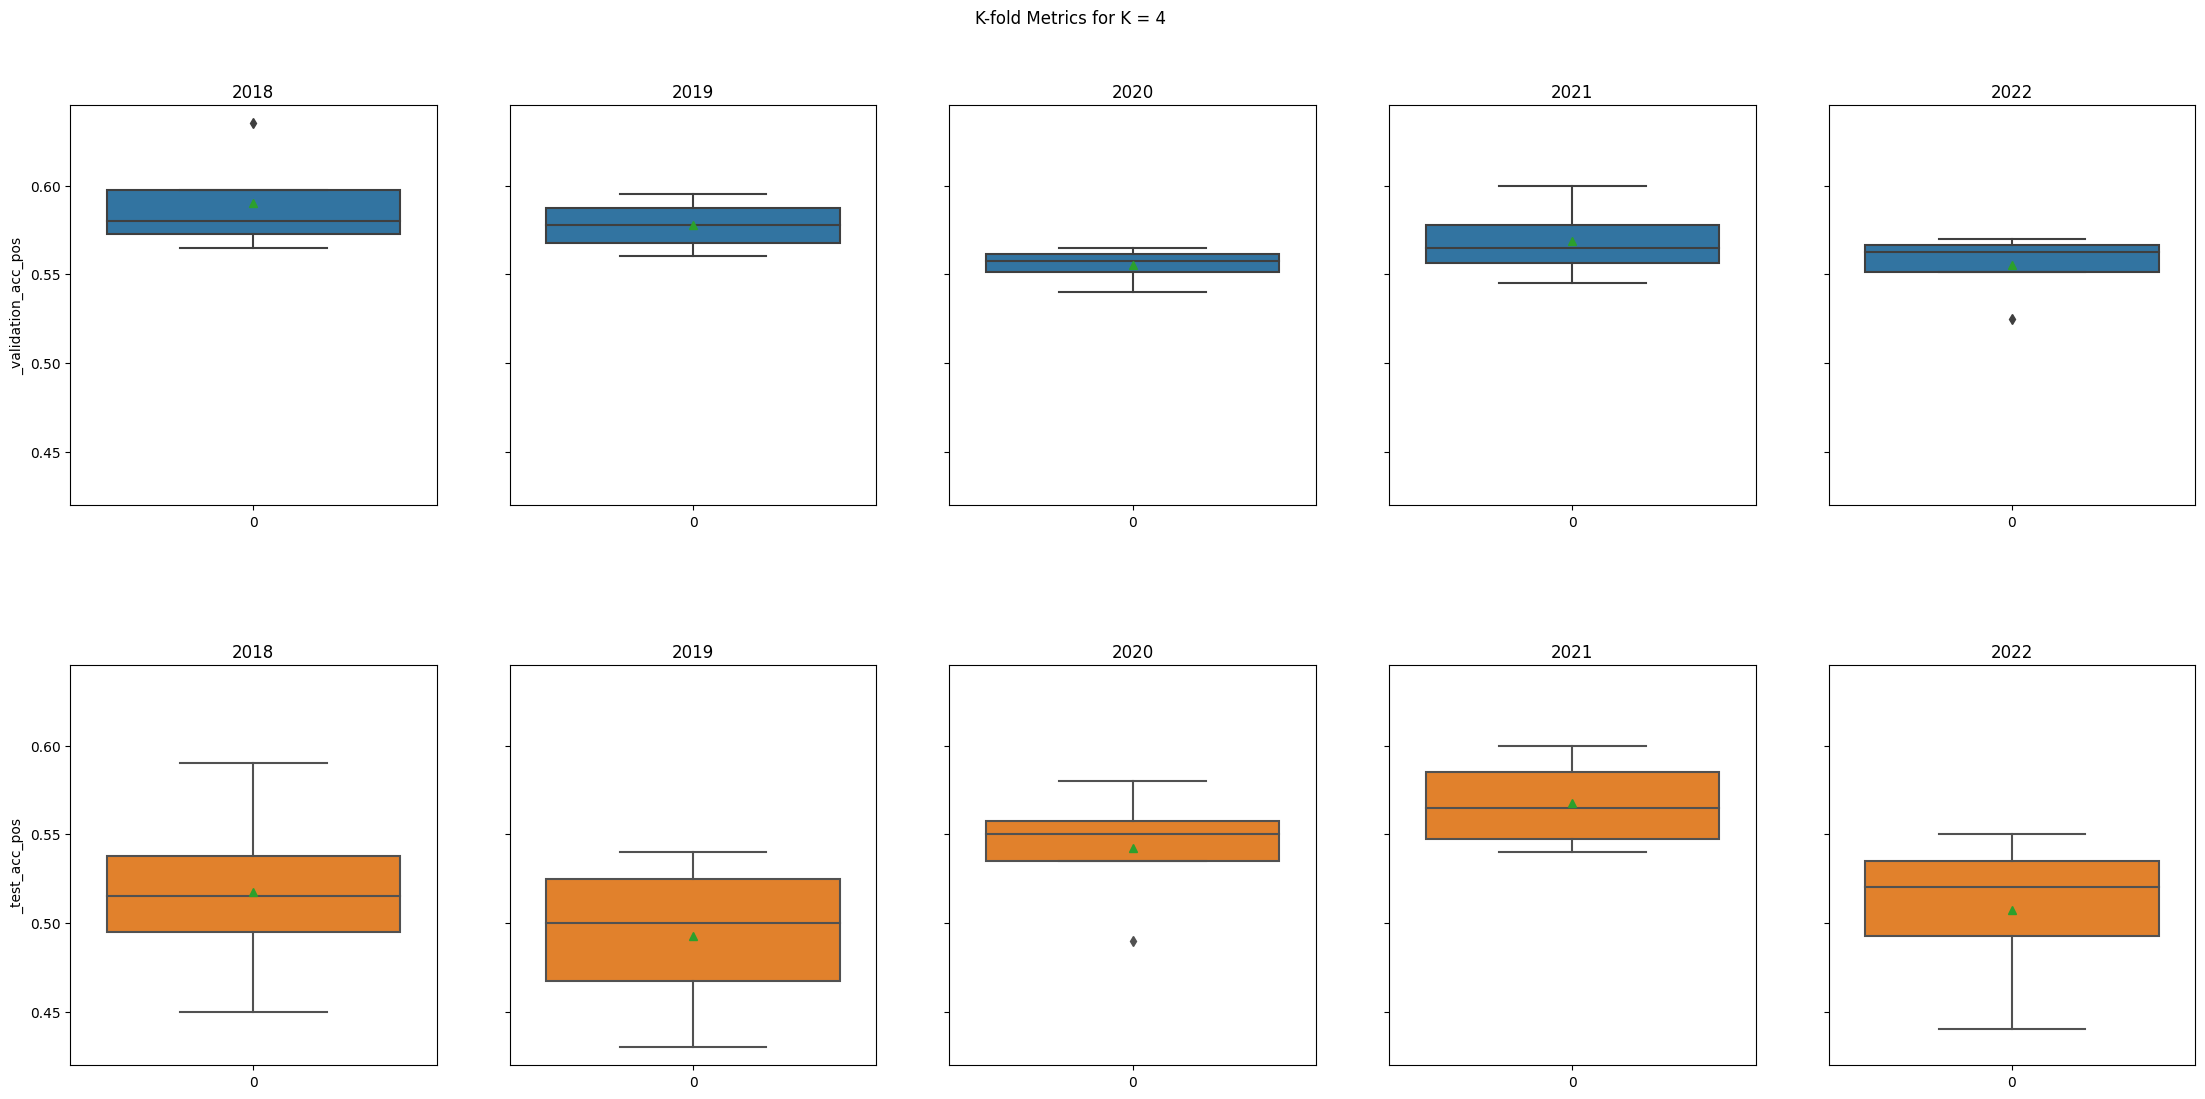

In [75]:
import os
if not os.path.exists('figs'):
            os.makedirs('figs')
def plot_rocs(metrics):

    n = len(metrics)
    fig, axes = plt.subplots(1, n, figsize=(n*3, 3))
    fig.suptitle('ROC Curves')
    for idx, mets, in enumerate(metrics):
        x, y = mets['_test_ROC']
        auroc = mets['test_auroc']
        axes[idx].plot(x, y, label=f'test {auroc:.3f} AUC')
        x, y = mets['_train_ROC']
        auroc = mets['train_auroc']
        axes[idx].plot(x, y, label=f'train {auroc:.3f} AUC')
        
        x, y = mets['_validation_ROC']
        auroc = mets['validation_auroc']
        axes[idx].plot(x, y, label=f'validation {auroc:.3f} AUC')
        
        axes[idx].plot(x, x, 'r-.')
        if(mets.k):
            axes[idx].set_xlabel(f'{mets.year}, k = {mets.k}')
        else:
            axes[idx].set_xlabel(f'{mets.year}')
        axes[idx].legend()
    fig.tight_layout()
    plt.savefig('figs/fig1.png')
    plt.clf()

    fig, axes = plt.subplots(1, len(metrics), figsize=(n*3, 3))
    fig.suptitle('Precision Recall Curves')
    for idx, mets, in enumerate(metrics):
        x, y = mets['_test_PRC']
        axes[idx].plot(x, y, label='test')
        x, y = mets['_validation_PRC']
        axes[idx].plot(x, y, label='validation')
        x, y = mets['_train_PRC']
        axes[idx].plot(x, y, label='train')
        if(mets.k):
            axes[idx].set_xlabel(f'{mets.year}, k = {mets.k}')
        else:
            axes[idx].set_xlabel(f'{mets.year}')
    fig.tight_layout()
    plt.savefig('figs/fig2.png')
    plt.clf()

plot_rocs(all_metrics)



def organize_metrics(metrics):
    year_dict = {}
    for mets in metrics:
        annual_stats = defaultdict(list)
        if mets.year not in year_dict:
            year_dict[mets.year] = annual_stats
        
        for m in mets:
            year_dict[mets.year][m].append(mets[m])
    return year_dict

def boxplot(metrics_dict, names, save_path=None):
    n_years = len(metrics_dict)
    n_names = len(names)
    fig, axes = plt.subplots(n_names, n_years, figsize=(n_years*5, n_names*6), sharey=True)
    fig.tight_layout()
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.9, wspace=0.2, hspace=0.4)
    colors = sns.color_palette(n_colors=n_names)
    k = 0
    for i, name in enumerate(names):
        for j, year in enumerate(metrics_dict):
            if not metrics_dict[year][name]:
                raise KeyError(f'{name} does not exist in provided metrics')
            sns.boxplot(metrics_dict[year][name], ax=axes[i, j], orient='vertical', palette=[colors[i]], showmeans=True)
            k = len(metrics_dict[year][name])
            axes[i, j].set_title(year)
            if j == 0:
                axes[i, j].set_ylabel(name)
    fig.suptitle(f'K-fold Metrics for K = {k}')
    if save_path:
        plt.savefig(f'{save_path}_boxplot.png')
    else:
        plt.savefig('figs/boxplot.png')

boxplot(organize_metrics(all_metrics), 
    names = ["validation_auroc", "test_auroc"], save_path="figs/short_data_auroc")

boxplot(organize_metrics(all_metrics), 
    names = ["_validation_acc_pos", "_test_acc_pos"], save_path="figs/short_data_accuracy")

def print_evaluation_summary(metrics_dict, names):
    year_summary = {}
    for year in metrics_dict:
        year_summary.setdefault(year, {})
        for name in names:
            year_summary[year][f'{name}_average'] = np.mean(metrics_dict[year][name])
            year_summary[year][f'{name}_min'] = np.min(metrics_dict[year][name])
            year_summary[year][f'{name}_max'] = np.max(metrics_dict[year][name])
    
    for year in year_summary:
        print(year)
        for val in year_summary[year]:
            print(f'{val}: {np.round(year_summary[year][val], 3)}')
        print('\n')
    return year_summary

print_evaluation_summary(organize_metrics(all_metrics),
    names=["_train_acc_pos", "_validation_acc_pos", "_test_acc_pos"])